# tensor intro

In [ ]:
import torch 
import numpy as np

In [ ]:
# creating tensor
#1. directly from the data 
a = [[1,2,3],[3,4,5]]
a_tensor = torch.tensor(a)

In [ ]:
#2. From a numpy array
np_array = np.array(a)
a_np = torch.from_numpy(np_array)

In [ ]:
#3 from another tensor
a_ones = torch.ones_like(a_tensor) # this retains the properties of a
print("this is a ones tensor",a_ones)
a_rand = torch.rand_like(a_tensor,dtype = torch.float)# overides the initail int datatype
print("this is a random tensor",a_rand)

this is a ones tensor tensor([[1, 1, 1],
        [1, 1, 1]])
this is a random tensor tensor([[0.7649, 0.3820, 0.8107],
        [0.6353, 0.9511, 0.3196]])


In [ ]:
shape = (2,3,4)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[[0.4659, 0.3526, 0.2570, 0.5158],
         [0.2458, 0.8133, 0.1595, 0.5600],
         [0.3577, 0.5411, 0.1838, 0.8380]],

        [[0.7755, 0.1488, 0.2098, 0.1868],
         [0.4174, 0.7444, 0.4500, 0.9876],
         [0.4256, 0.6154, 0.9582, 0.7788]]]) 

Ones Tensor: 
 tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]]) 

Zeros Tensor: 
 tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])


In [ ]:
# attributes of tensor
tensor = torch.rand(2,3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([2, 3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [ ]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
  tensor = tensor.to('cuda')
else:
  print("gpu not available")

gpu not available


In [ ]:
# performing operation on tensor similiar ot list
tensor = torch.ones(4, 4)
tensor[:,2:-1] = 0
print(tensor)

tensor([[1., 1., 0., 1.],
        [1., 1., 0., 1.],
        [1., 1., 0., 1.],
        [1., 1., 0., 1.]])


In [ ]:
# performing concatination
tensor1 = torch.ones(4,4)
t1 = torch.cat([tensor, tensor, tensor1], dim=0)
print(t1)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [ ]:
# This computes the element-wise product
print(f"tensor.mul(tensor) \n {tensor.mul(tensor1)} \n")
# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor1}")

tensor.mul(tensor) 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor * tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [ ]:
# this preforms matrix wise multiplication
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor1.T)} \n")
# Alternative syntax:
print(f"tensor @ tensor.T \n {tensor @ tensor1.T}")

tensor.matmul(tensor.T) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

tensor @ tensor.T 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


In [ ]:
# in place operators where _ suffix wil change a
print(tensor, "\n")
tensor.add_(5)
print(tensor)
# there use is discoraged because of immediate loss of history

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


In [ ]:
# tensor on cpu and numpy can share memory location
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [ ]:
# but a change in tensor will reflect a change in numpys
t.add_(4)
print(t)
print(n)

tensor([5., 5., 5., 5., 5.])
[5. 5. 5. 5. 5.]


In [ ]:
# similiarly numpy array can be converted to tensor
b = np.ones((4,4))
t = torch.from_numpy(b)
# but changes in array will also affect changes in tensor and vice versa

In [ ]:
np.add(b,1,out = b)

array([[2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.]])

In [ ]:
print(b)
print(t)

[[2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]]
tensor([[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]], dtype=torch.float64)


In [ ]:
t.add_(23)

tensor([[25., 25., 25., 25.],
        [25., 25., 25., 25.],
        [25., 25., 25., 25.],
        [25., 25., 25., 25.]], dtype=torch.float64)

In [ ]:
print(b)
print(t)

[[25. 25. 25. 25.]
 [25. 25. 25. 25.]
 [25. 25. 25. 25.]
 [25. 25. 25. 25.]]
tensor([[25., 25., 25., 25.],
        [25., 25., 25., 25.],
        [25., 25., 25., 25.],
        [25., 25., 25., 25.]], dtype=torch.float64)


# dataset and dataloaders


In [ ]:
# loading dataset
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw

Processing...


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


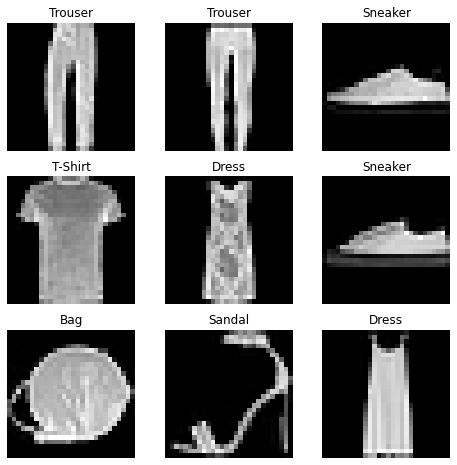

In [ ]:
# iterating and visualizing the dataset
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
# creating a custom dataset
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        sample = {"image": image, "label": label}
        return sample

In [ ]:
# preparing loading of data through dataloaders
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


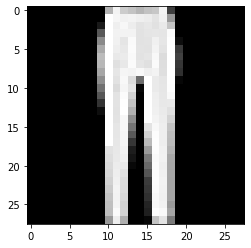

Label: 1


In [ ]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# transformers

transformers are used to modify the features <br>
target_transformers are used to modify the labels <br>
search for torchvision.transforms for more info

In [ ]:
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
from torchvision import transforms

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

To tensor converts pil image or nd.array to float tensor<br> and lambda function performs user defined function <br> here we convert the numbers into one hot encoding


In [ ]:
train_dataload = DataLoader(ds, batch_size=128, shuffle=True)

In [ ]:
train_features, train_labels = next(iter(train_dataload))

In [ ]:
print(train_labels[2])

tensor([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])


In [ ]:
# performing new transformations to images
change  = transforms.RandomApply(torch.nn.ModuleList([
     transforms.ColorJitter(),
]), p=0.7)

# building a neural network

In [1]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cpu device


In [9]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*38, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [10]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=1064, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


In [11]:
X = torch.rand(1, 28, 38, device=device)
logits = model(X)
print(" The logits are ",logits)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

 The logits are  tensor([[0.0000, 0.0153, 0.0000, 0.0000, 0.0000, 0.0221, 0.0000, 0.0075, 0.0332,
         0.0000]], grad_fn=<ReluBackward0>)
Predicted class: tensor([8])


In [15]:
# testing layers on an image
input_image = torch.rand(3,28,38)
print(input_image.size())

torch.Size([3, 28, 38])


In [17]:
# flattening the random image into a contiguous array of 1064 pixels
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 1064])


In [20]:
# the linear layer performs a linear transformation using stored weights and bias
layer1 = nn.Linear(in_features=28*38, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())
print(hidden1)

torch.Size([3, 20])
tensor([[-2.2108e-01,  2.8580e-01, -5.8817e-02, -4.8185e-01,  3.3746e-01,
          4.3088e-01,  2.6945e-01, -1.4022e-01, -2.8907e-01, -1.1574e-01,
         -7.3580e-02, -5.7583e-02, -2.7998e-01,  6.3805e-01, -8.3579e-01,
         -1.0874e-01,  1.5932e-02, -3.7786e-02, -4.6662e-01,  4.5407e-01],
        [-4.7069e-01,  1.1315e-01,  2.2036e-01, -7.0691e-01, -1.6451e-01,
         -1.3805e-01,  4.5620e-02, -3.3222e-01, -3.4414e-01, -9.1905e-02,
          2.7723e-01,  2.2933e-01, -3.8564e-01,  5.1783e-01, -5.7639e-01,
         -5.3967e-02, -2.4239e-01, -4.4406e-01,  7.9308e-04,  5.1177e-01],
        [-4.9527e-02,  1.4149e-01,  5.4043e-01, -6.0401e-01, -2.1351e-01,
          3.6339e-01, -1.8197e-01, -1.6192e-01, -2.8707e-01, -3.2002e-01,
          2.7713e-01,  6.2293e-02, -2.5558e-01,  4.3529e-01, -2.0360e-01,
          3.0203e-01,  3.0968e-01, -5.9946e-02, -2.4611e-01,  5.9399e-01]],
       grad_fn=<AddmmBackward>)


In [21]:
# using the relu activation function on my linear layer
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[-2.2108e-01,  2.8580e-01, -5.8817e-02, -4.8185e-01,  3.3746e-01,
          4.3088e-01,  2.6945e-01, -1.4022e-01, -2.8907e-01, -1.1574e-01,
         -7.3580e-02, -5.7583e-02, -2.7998e-01,  6.3805e-01, -8.3579e-01,
         -1.0874e-01,  1.5932e-02, -3.7786e-02, -4.6662e-01,  4.5407e-01],
        [-4.7069e-01,  1.1315e-01,  2.2036e-01, -7.0691e-01, -1.6451e-01,
         -1.3805e-01,  4.5620e-02, -3.3222e-01, -3.4414e-01, -9.1905e-02,
          2.7723e-01,  2.2933e-01, -3.8564e-01,  5.1783e-01, -5.7639e-01,
         -5.3967e-02, -2.4239e-01, -4.4406e-01,  7.9308e-04,  5.1177e-01],
        [-4.9527e-02,  1.4149e-01,  5.4043e-01, -6.0401e-01, -2.1351e-01,
          3.6339e-01, -1.8197e-01, -1.6192e-01, -2.8707e-01, -3.2002e-01,
          2.7713e-01,  6.2293e-02, -2.5558e-01,  4.3529e-01, -2.0360e-01,
          3.0203e-01,  3.0968e-01, -5.9946e-02, -2.4611e-01,  5.9399e-01]],
       grad_fn=<AddmmBackward>)


After ReLU: tensor([[0.0000, 0.2858, 0.0000, 0.0000, 0.3375, 

In [23]:
# the sequential layer is an ordered container of modules. the data is passed through all the modules in the sequence defined
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,38)
logits = seq_modules(input_image)

In [27]:
# the softmaz layer here the logits are scaled between the values of 0 to 1 to represent the probabilities
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

In [29]:
print(pred_probab)
print(logits)

tensor([[0.1105, 0.0855, 0.0836, 0.0942, 0.1014, 0.1080, 0.0996, 0.1245, 0.1046,
         0.0882],
        [0.1190, 0.0862, 0.0778, 0.1027, 0.1062, 0.0968, 0.1020, 0.1163, 0.1005,
         0.0926],
        [0.1183, 0.0806, 0.0847, 0.0919, 0.1019, 0.1078, 0.1025, 0.1164, 0.1188,
         0.0772]], grad_fn=<SoftmaxBackward>)
tensor([[-0.0739, -0.3302, -0.3526, -0.2335, -0.1600, -0.0968, -0.1775,  0.0456,
         -0.1287, -0.2990],
        [ 0.0294, -0.2933, -0.3957, -0.1180, -0.0841, -0.1766, -0.1249,  0.0062,
         -0.1397, -0.2211],
        [ 0.0223, -0.3615, -0.3114, -0.2297, -0.1273, -0.0707, -0.1212,  0.0058,
          0.0263, -0.4048]], grad_fn=<AddmmBackward>)


In [30]:
# viewing the model structure and the parameters of the model
print("Model structure: ", model, "\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure:  NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=1064, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
) 


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 1064]) | Values : tensor([[-0.0014,  0.0215,  0.0135,  ...,  0.0072, -0.0194,  0.0135],
        [-0.0075,  0.0291, -0.0002,  ..., -0.0193,  0.0294,  0.0094]],
       grad_fn=<SliceBackward>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([-0.0116, -0.0073], grad_fn=<SliceBackward>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0038, -0.0105, -0.0089,  ...,  0.0232, -0.0156, -0.0185],
        [-0.0059, -0.0004, -0.0347,  ..., -0.0281,  0.0275,  0.0021]],
       grad_fn=<SliceBackward>) 

Layer: linear_rel

# torch.autograd

In [31]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [32]:
print('Gradient function for z =',z.grad_fn)
print('Gradient function for loss =', loss.grad_fn)

Gradient function for z = <AddBackward0 object at 0x7f1b86e6f4d0>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward object at 0x7f1b86e64e90>


In [33]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.2745, 0.3286, 0.3152],
        [0.2745, 0.3286, 0.3152],
        [0.2745, 0.3286, 0.3152],
        [0.2745, 0.3286, 0.3152],
        [0.2745, 0.3286, 0.3152]])
tensor([0.2745, 0.3286, 0.3152])


In [34]:
# to disable gradient tracking use with torch.no_grad()
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


In [35]:
# use can also use the detach method
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

False


reasons to disable tracking <br> 1. To mark some parameters in your neural network at frozen parameters. This is a very common scenario for finetuning a pretrained network
2. To speed up computations when you are only doing forward pass, because computations on tensors that do not track gradients would be more efficient.

# optimizing model parameters

In [36]:

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [37]:
# initializing learning rate, batch_size and no of epochs to be trained
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [39]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

In [40]:
# initializing the optimizer for the learning rate 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [41]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [42]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.299669  [    0/60000]
loss: 2.290792  [ 6400/60000]
loss: 2.276610  [12800/60000]
loss: 2.281763  [19200/60000]
loss: 2.264864  [25600/60000]
loss: 2.246360  [32000/60000]
loss: 2.235647  [38400/60000]
loss: 2.210996  [44800/60000]
loss: 2.225112  [51200/60000]
loss: 2.207754  [57600/60000]
Test Error: 
 Accuracy: 50.2%, Avg loss: 0.034564 

Epoch 2
-------------------------------
loss: 2.196007  [    0/60000]
loss: 2.192411  [ 6400/60000]
loss: 2.155333  [12800/60000]
loss: 2.175517  [19200/60000]
loss: 2.121203  [25600/60000]
loss: 2.118728  [32000/60000]
loss: 2.077704  [38400/60000]
loss: 2.042058  [44800/60000]
loss: 2.076323  [51200/60000]
loss: 2.043037  [57600/60000]
Test Error: 
 Accuracy: 51.2%, Avg loss: 0.031730 

Epoch 3
-------------------------------
loss: 2.023902  [    0/60000]
loss: 2.006485  [ 6400/60000]
loss: 1.933256  [12800/60000]
loss: 1.980602  [19200/60000]
loss: 1.862341  [25600/60000]
loss: 1.904545  [32000/600

# saving and loading the model

In [43]:
import torch
import torch.onnx as onnx
import torchvision.models as models

In [44]:
# saving and loading model weights
model = models.vgg16(pretrained=True)
torch.save(model.state_dict(), 'model_weights.pth')

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


In [45]:
# to load weights in vgg16 model architecture
model = models.vgg16() # we do not specify pretrained=True, i.e. do not load default weights
model.load_state_dict(torch.load('model_weights.pth'))
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [46]:
# to save the whole model
torch.save(model, 'model.pth')

In [47]:
# to laod the whole model
model = torch.load('model.pth')